In [193]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt


#read data
df = pd.read_csv ('F:/ML/data.csv', header=None, nrows=100)

In [194]:
#data cleansing

df[4] = df[4].replace('Iris-setosa', 1)
df[4] = df[4].replace('Iris-versicolor', 0)

#Slicing Subsets of Rows and Columns
traindata1 = df.iloc [:40,:4]
traindata0 = df.iloc [50:90,:4]
trainfact1 = df.iloc [:40, 4]
trainfact0 = df.iloc [50:90, 4]

traindata = traindata1.append(traindata0).values
trainfact = trainfact1.append(trainfact0).values

valdata1 = df.iloc [40:50,:4]
valdata0 = df.iloc [90:100,:4]
valfact1 = df.iloc [40:50,4]
valfact0 = df.iloc [90:100,4]

valdata = valdata1.append(valdata0).values
valfact = valfact1.append(valfact0).values

#print (traindata)
#print (valdata)


In [195]:
#init var

theta = np.array ([0.1,0.15,0.2,0.25])
bias = 0.3
#a = 0.1
a = 0.8
epoch = 60
total_errors = 0
train_errors = np.zeros(epoch)
val_errors = np.zeros(epoch)

In [196]:
#func
def h (x, t, b) :
    return  np.dot(x, theta)+b

def sigmoid (h) :
    return 1/(1+mt.exp(-h))

def pred (sigmoid) :
    if sigmoid > 0.5 :
        return 1
    else :
        return 0
    
def error (f,sigmoid) :
    return (sigmoid-f)**2

def delt (f, sigmoid, xn) :
    return 2*(sigmoid-f)*(1-sigmoid)*sigmoid*xn

def delb (f, sigmoid) :
    return 2*(sigmoid-f)*(1-sigmoid)*sigmoid

def newt(a, tn, dtn) :
    return tn-(a*dtn)

def newb (a, b, delb) :
    return b-(a*delb)

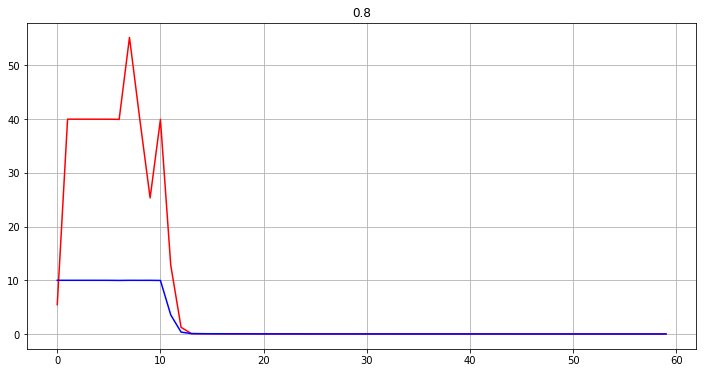

In [197]:
#Loop

for i in range (epoch):
#for i in range (1):
    
    for j in range(len(traindata)):
    #for j in range(1):
        rh = h(traindata[j,:4],theta, bias)
        #print("h:")
        #print(rh)
        #print("----------------")
        #print(theta)
        #print(bias)
        
        rsigmoid = sigmoid(rh)
        #print("sigmoid :")
        #print(rsigmoid)
        #print("----------------")
        
        rpred = pred(rsigmoid)
        #print("pred :")
        #print(rpred)
        #print("----------------")
        
        rerror = error(trainfact[j],rsigmoid)
        #print("error :")
        #print(rerror)
        #print("----------------")
        
        #zero array to save delta
        arr_dt = np.zeros(4)
        arr_db = np.zeros(1)
        
        #print("arr_dt :")
        for k in range(len(arr_dt)):
            arr_dt[k] = delt(trainfact[j],rsigmoid,traindata[j,k])
        #print(arr_dt)
        #print("----------------")
                    
        arr_db = delb(trainfact[j],rsigmoid)
        #print("arr_db :")
        #print(arr_db)
        #print("----------------")
        
        #print("ntheta :")
        for l in range (len(theta)):
            theta[l] = newt(a, theta[l],  arr_dt[l])
        #print (theta)
        #print("----------------")
        
        bias = newb(a,bias,arr_db)
        #print("nbias :")
        #print(bias)
        #print("----------------")
        
        total_errors += rerror 
    
    #print(total_errors)
    train_errors[i]=total_errors
    total_errors=0
    
    for m in range (len(valdata)):
        rh = h(valdata[m,:4],theta, bias)
        #print("h:")
        #print(rh)
        #print("----------------")
        #print(theta)
        #print(bias)
        
        rsigmoid = sigmoid(rh)
        #print("sigmoid :")
        #print(rsigmoid)
        #print("----------------")
        
        rpred = pred(rsigmoid)
        #print("pred :")
        #print(rpred)
        #print("----------------")
        
        rerror = error(valfact[m],rsigmoid)
        #print("error :")
        #print(rerror)
        #print("----------------")
        
        total_errors += rerror 
        
    #print(total_errors)
    val_errors[i]=total_errors
    total_errors=0

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_title(a)
plt.plot (train_errors, 'r', val_errors, 'b',)
plt.grid(True)
plt.show ()

